In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import os
import shapely
from shapely.geometry import shape
import fiona
from fiona.crs import from_epsg
import sys
import requests

In [2]:
#read in data for chart
url = 'https://raw.githubusercontent.com/tharma3/PUI2018_mrn291/master/HW8_mrn291/vulnerable_pops_for_chart.csv'
vulnerable_pops_data = pd.read_csv(url)

In [3]:
#change directory to homework to put image in, or just stay in whatever directory you're in
try:
    os.chdir('/nfshome/mrn291/PUI2018_mrn291/HW8_mrn291')
except Exception:
    pass
    

#### Description of the Dataset

This dataset is based on an anonymized list of citizens in New York City who may be vulnerable (i.e. have difficulty evacuating) in the event of a coastal storm. I have access to this list through my job but it is not publicly released. To preprocess this data, I used a spatial join of this client list against the [Sandy Inundation Zone](https://data.cityofnewyork.us/Environment/Sandy-Inundation-Zone/uyj8-7rv5) from New York City Open Data to filter the list to just clients in the Sandy Inundation Zone, and then joined the [PLUTO Data](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page) to get the type of building (building class) from the PLUTO dataset.

In [4]:
r = [0,1,2,3,4]
categories = ['A','B','C','D']

data = []

for category in categories:
    data.append(vulnerable_pops_data[vulnerable_pops_data['category'] == category].percent.tolist())

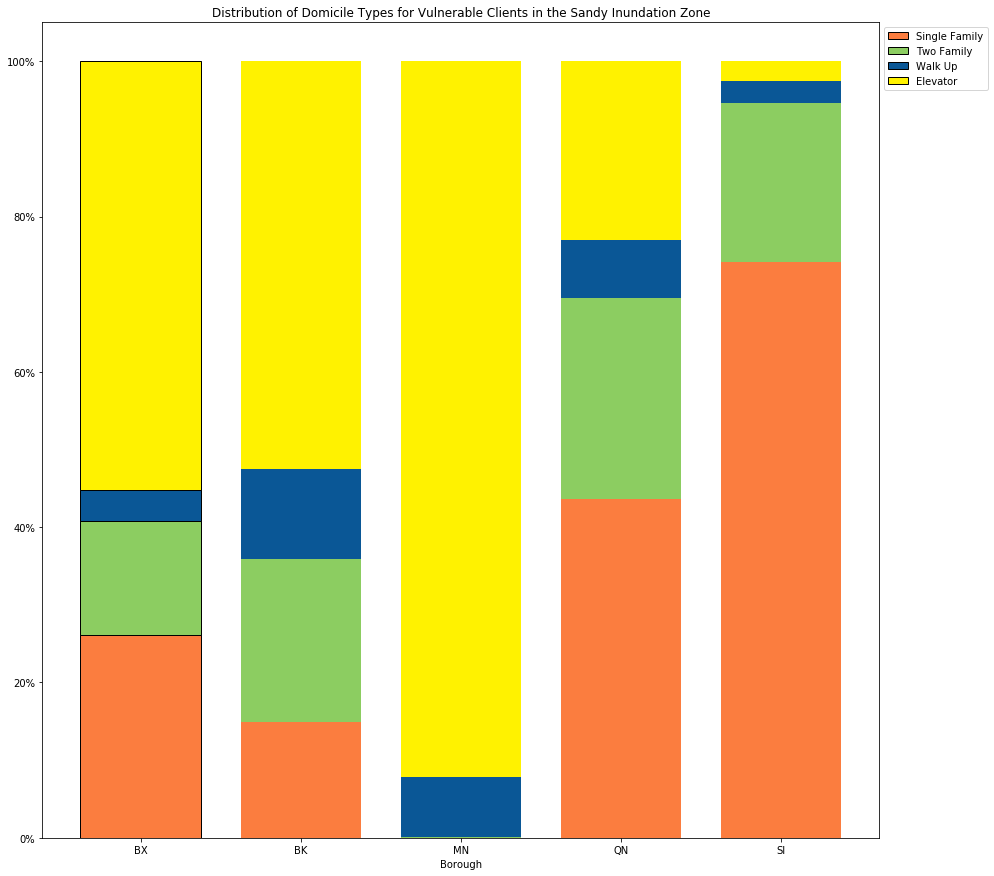

In [5]:
#plot
barwidth = 0.75
names = ['BX','BK','MN','QN','SI']
colors = ['#fb7d3f','#8ccd61','#0a5796','#fff200']
y_names = ['0%','20%','40%','60%','80%','100%']

fig = plt.figure(figsize=(15,15))

plt.bar(r, data[0], color='#fb7d3f', edgecolor='black', width=barwidth, label='Single Family')
plt.bar(r, data[1], color='#8ccd61', bottom=data[0], edgecolor='black', width=barwidth, label='Two Family')
plt.bar(r, data[2], bottom=[i+j for i,j in zip(data[0], data[1])], color='#0a5796', edgecolor='black', width=barwidth, label='Walk Up')
plt.bar(r, data[3], bottom=[i+j+k for i,j,k in zip(data[0], data[1], data[2])], color='#fff200', edgecolor='black', width=barwidth, label='Elevator')
    
plt.xticks(r, names)
plt.yticks(np.arange(0, 1.2,0.2), y_names)
plt.xlabel("Borough")

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Distribution of Domicile Types for Vulnerable Clients in the Sandy Inundation Zone')

plt.savefig('distribution_by_borough.png')
plt.show()

Figure showing the distribution of the 4 major housing types in each borough for clients who are potentially vulnerable in the event of a coastal storm.